#### Business Goal

We are rquired to model price of car with the available independent variable. It will be used by the managment to understand how exactly the price vary with independent variables. They can accordingly manipulate the design of the cars, the business startegy etc. to meet the certain price levels. Further the model will be good way to understand the pricing dynamic of the new market.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


import warnings 
warnings.filterwarnings('ignore')

In [2]:
cars = pd.read_csv("CarPrice_Assignment.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
cars.shape

(205, 26)

In [4]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
cars['companyname'] = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.drop(['CarName'],axis = 1, inplace=True)
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [7]:
cars.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
cars.companyname = cars.companyname.str.lower()

def replace_name(a,b):
    cars.companyname.replace(a,b,inplace = True)
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [9]:
cars.loc[cars.duplicated()]

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname


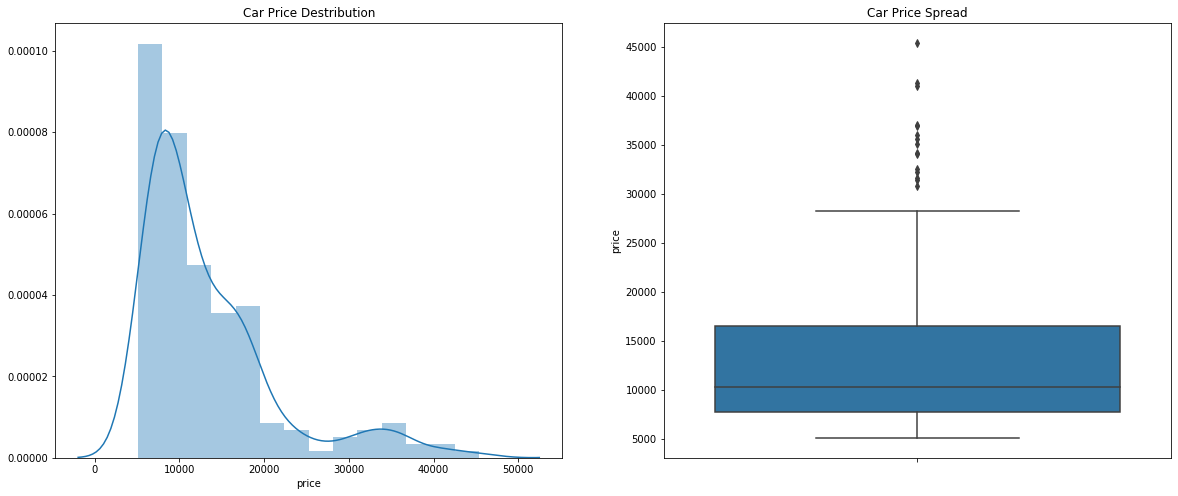

In [10]:
plt.figure(figsize = (20,8))

plt.subplot(1,2,1)
plt.title("Car Price Destribution")
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title("Car Price Spread")
sns.boxplot(y= cars.price)

plt.show()

In [11]:
print(cars.price.describe(percentiles = [0.25,0.5,0.75,0.85,0.90,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


- The plot seems to be right-skwed, meaning that most of the price in the data set below 15k. 
- There is a significant distribution between mean and median of price destribustion. 
- The data points are far spread out from the mean, which indicates a high variance in the car price(85% of the price are below 18,500, where as remaining 15% are between 18,500 and 45,000.)

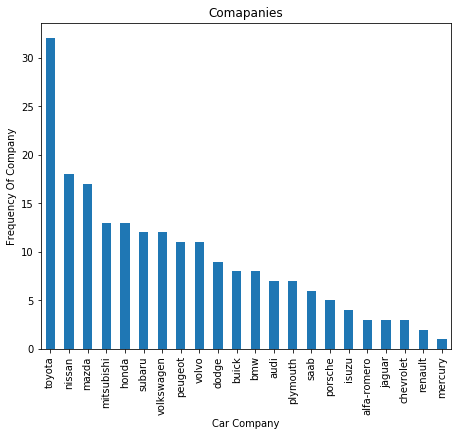

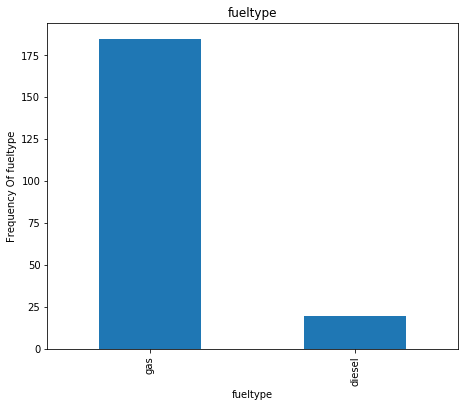

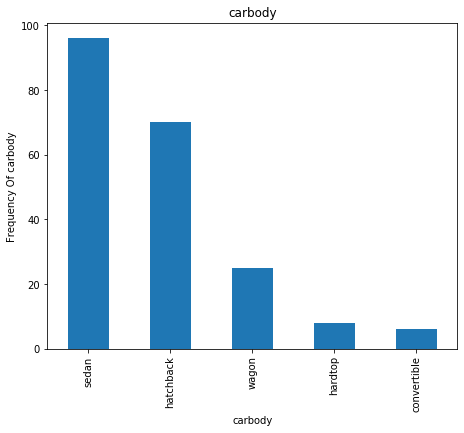

In [12]:
plt.figure(figsize = (25,6))

plt.subplot(1,3,1)
plt1 = cars.companyname.value_counts().plot(kind = 'bar')
plt.title('Comapanies')
plt1.set(xlabel = "Car Company",ylabel = "Frequency Of Company")

plt.figure(figsize = (25,6))

plt.subplot(1,3,2)
plt1 = cars.fueltype.value_counts().plot(kind = 'bar')
plt.title('fueltype')
plt1.set(xlabel = "fueltype",ylabel = "Frequency Of fueltype")

plt.figure(figsize = (25,6))

plt.subplot(1,3,1)
plt1 = cars.carbody.value_counts().plot(kind = 'bar')
plt.title('carbody')
plt1.set(xlabel = "carbody",ylabel = "Frequency Of carbody")

plt.show()

1. Toyota seemed to be favored car company 
2. Number of gass fuel car is more than number of diseal
3. Sedan is the top car type prefered

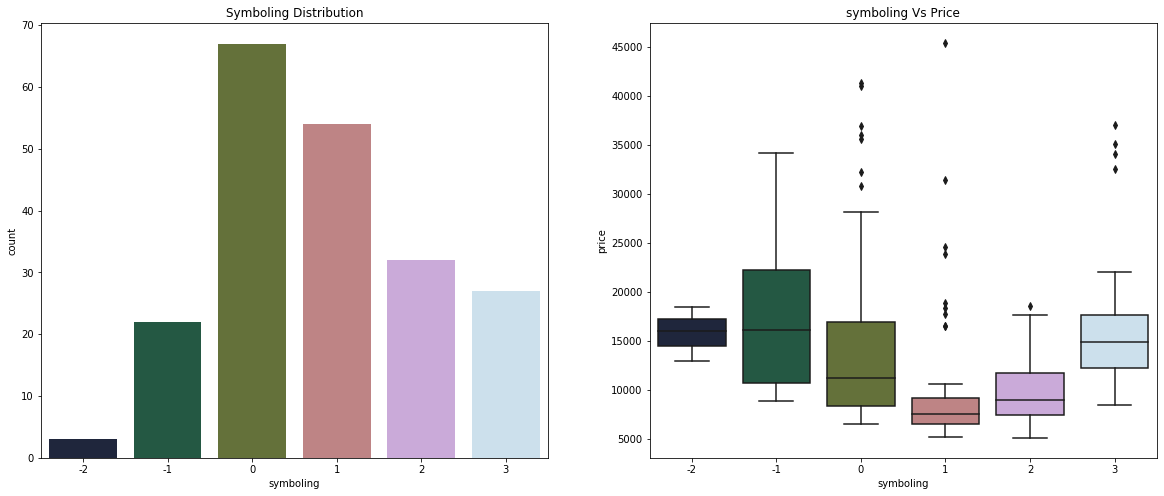

In [13]:
plt.figure(figsize =(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Distribution')
sns.countplot(cars.symboling,palette = ('cubehelix'))

plt.subplot(1,2,2)
plt.title('symboling Vs Price')
sns.boxplot(x= cars.symboling, y = cars.price , palette =('cubehelix') )

plt.show()

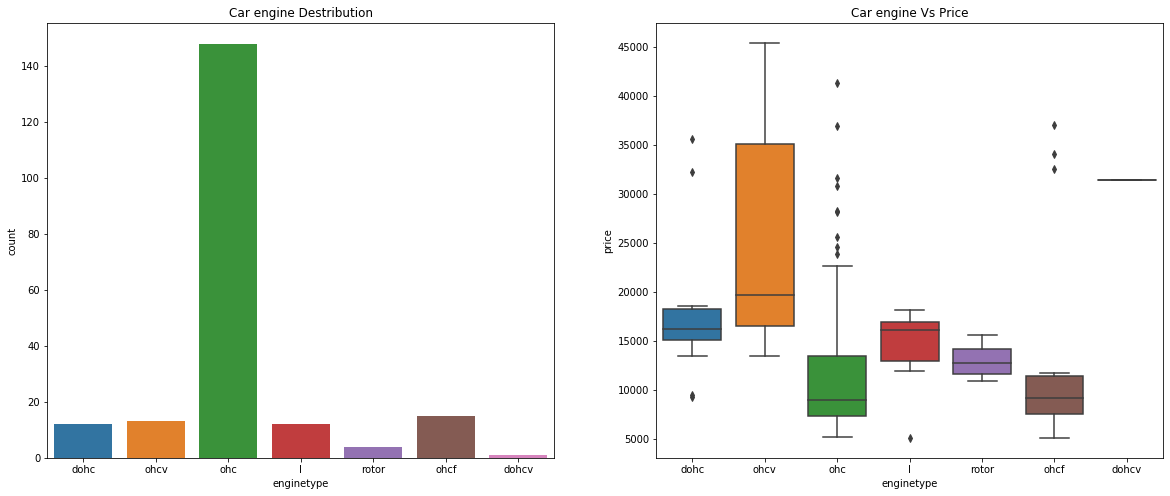

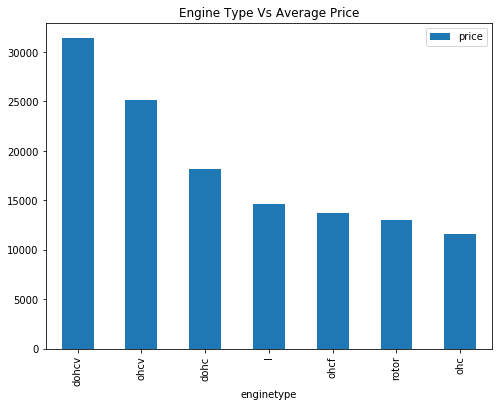

In [14]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title("Car engine Destribution")
sns.countplot(cars.enginetype)

plt.subplot(1,2,2)
plt.title("Car engine Vs Price")
sns.boxplot(x = cars.enginetype, y =cars.price)

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize= (8,6))
plt.title('Engine Type Vs Average Price')
plt.show()

1. OHC Engine Type to be most favoured type
2. OHCV has the highest price range,ohc and ohcf have the low price range. 

<Figure size 1800x432 with 0 Axes>

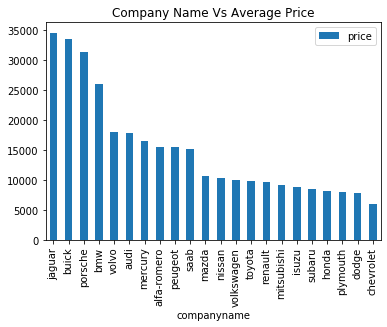

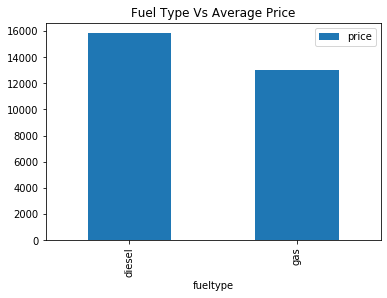

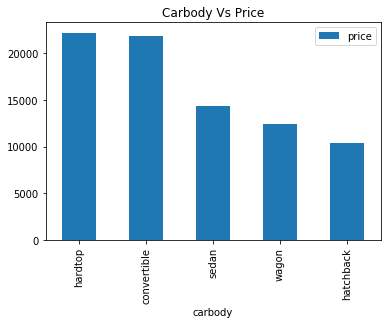

In [15]:
plt.figure(figsize = (25,6))
df = pd.DataFrame(cars.groupby(['companyname'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name Vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title("Fuel Type Vs Average Price")
plt.show()

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title("Carbody Vs Price")
plt.show()

1. Jaguar and Buick seem to have highest average price.
2. Diseal has a higher price than gas.
3. Hardtop and convertible have higher average price.

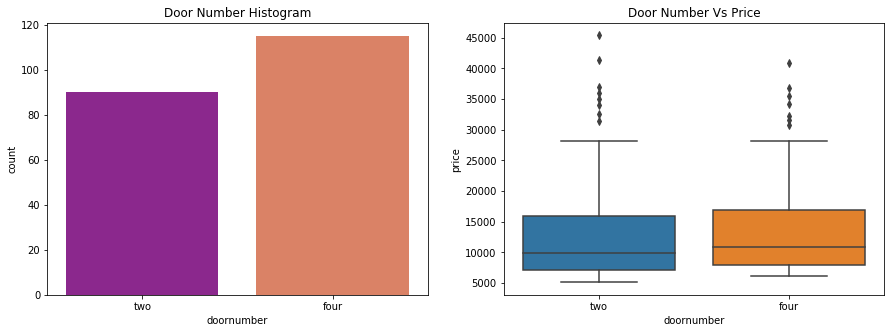

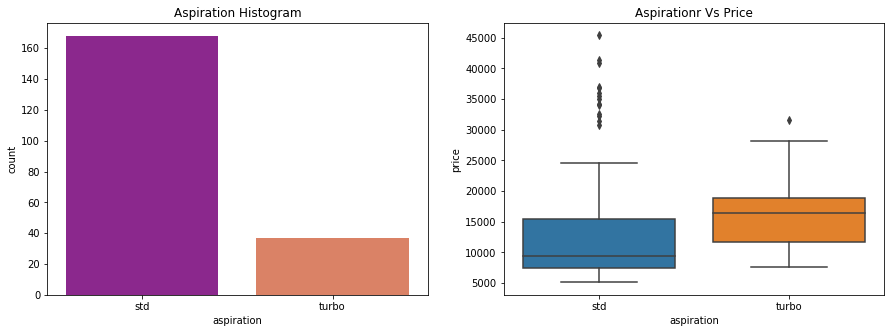

In [16]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Door Number Histogram")
sns.countplot(cars.doornumber,palette = ('plasma'))

plt.subplot(1,2,2)
plt.title("Door Number Vs Price")
sns.boxplot(x= cars.doornumber,y = cars.price)
plt.show()

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.title("Aspiration Histogram")
sns.countplot(cars.aspiration,palette = ('plasma'))

plt.subplot(1,2,2)
plt.title("Aspirationr Vs Price")
sns.boxplot(x= cars.aspiration,y = cars.price)

plt.show()

1. Doornumber variable is not affecting the price much. There is no significant difference between the categories in it. 
2. It seems aspiration with turbo have higher price range than std  (though it has some outliers outside the whiskers.)

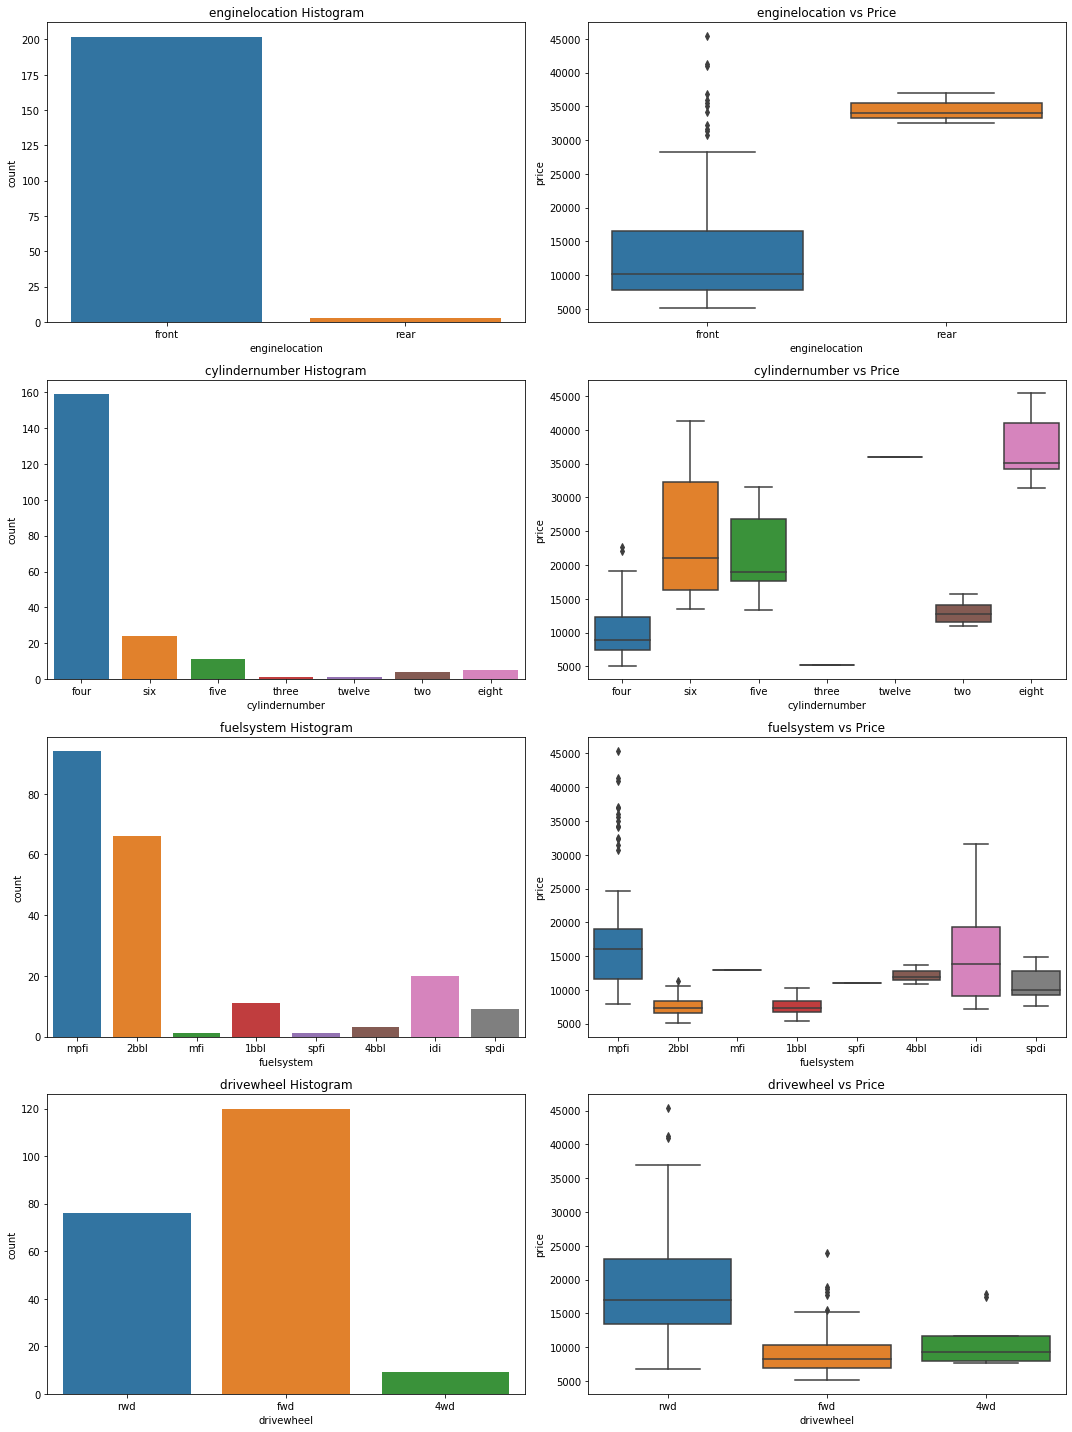

In [17]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x])
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x],y=cars['price'])

plt.figure(figsize=(15,20))

plot_count("enginelocation",1)
plot_count("cylindernumber",3)
plot_count("fuelsystem",5)
plot_count("drivewheel",7)

plt.tight_layout()

1. A very significant difference in driven wheel category, most high ranged cars seems to prefer froward driven wheels. 

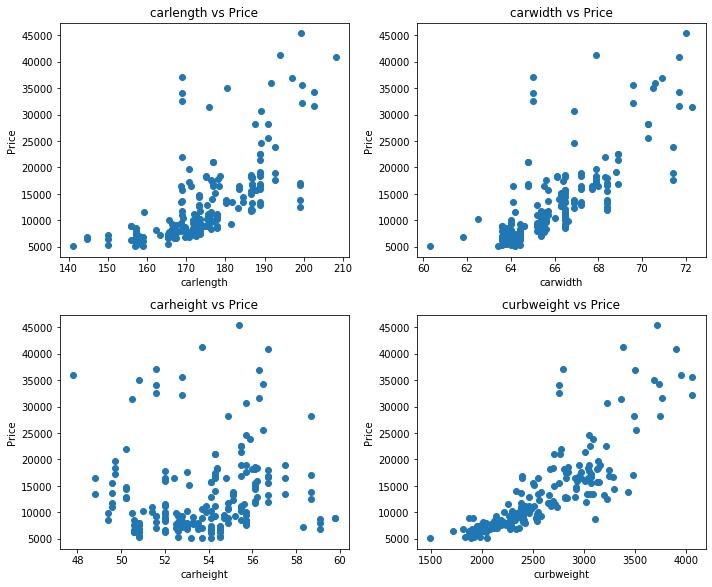

In [18]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(x = cars[x], y = cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize= (10,20))
    
scatter('carlength',1)
scatter('carwidth',2)
scatter('carheight',3)
scatter('curbweight',4)
    
plt.tight_layout()    
    

1. Carwidth,carlength and curbweight seems to have a positive correlation with price.
2. Carheight doesnt show any significant trend with the price.

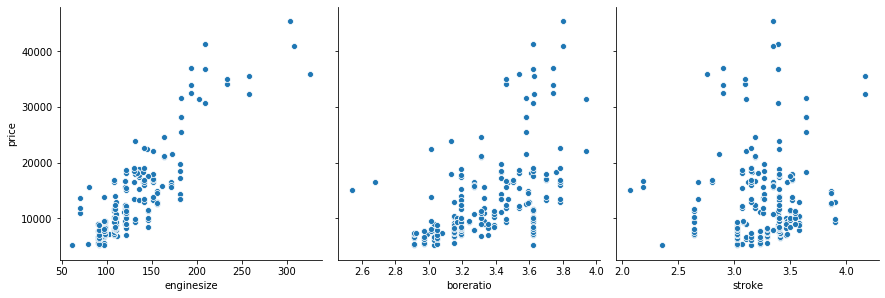

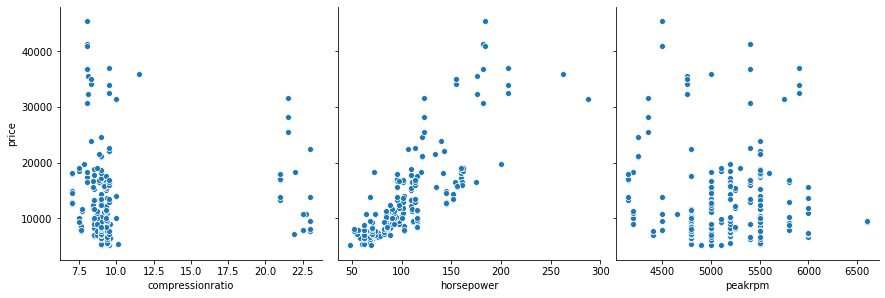

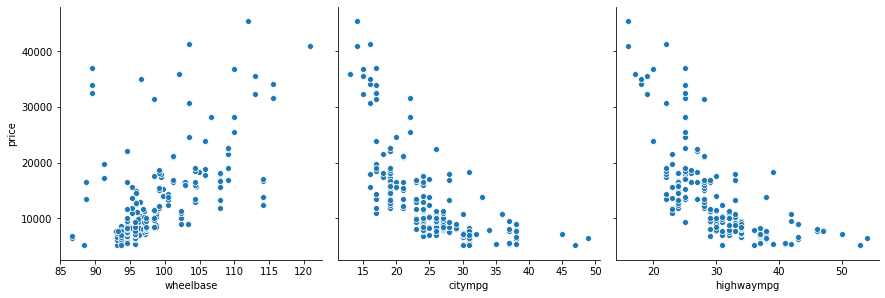

In [19]:
def pp(x,y,z):
    sns.pairplot(cars,x_vars =[x,y,z],y_vars=['price'],size = 4,aspect = 1,kind = "scatter")
    plt.show()

pp('enginesize','boreratio','stroke')
pp('compressionratio','horsepower','peakrpm')
pp('wheelbase','citympg','highwaympg')
    

1. enginesize,boreratio,horsepower,wheelbase - seem to have a significant postive correlation with price.
2. citympg,highmpg seem to have a significant negative correlation with price.

In [20]:
np.corrcoef(cars['carlength'],cars['carwidth'])[1,0]

0.841118268481846

In [21]:
cars['fueleconomy'] = (0.55*cars['citympg'])+(0.45*cars['highwaympg'])

In [22]:
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['companyname'])['price'].mean()
temp = temp.merge(table.reset_index(),how = 'left',on = 'companyname')
bins = [0,10000,20000,40000]
cars_bin = ['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right = False,labels = cars_bin)
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,companyname,fueleconomy,carsrange
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495,alfa-romero,23.70,Medium
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500,alfa-romero,23.70,Medium
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500,alfa-romero,22.15,Medium
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950,audi,26.70,Medium
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450,audi,19.80,Medium


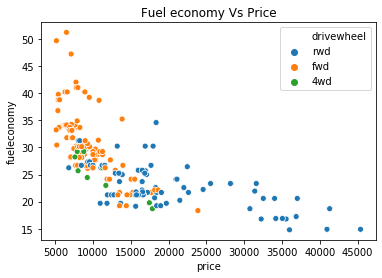

In [23]:
plt.title("Fuel economy Vs Price")
sns.scatterplot(x = cars["price"],y= cars["fueleconomy"],hue = cars['drivewheel'])
plt.show()


1. Fueleconomy has an obvious negative correlation with price and is significant.

<Figure size 3600x1080 with 0 Axes>

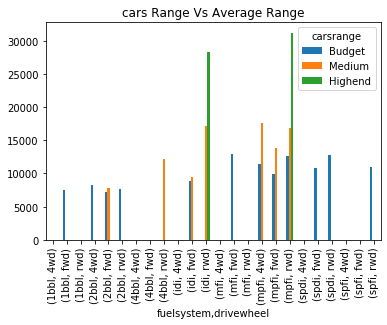

In [24]:
plt.figure(figsize = (50,15))
df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value = 0))
df.plot.bar()
plt.title('cars Range Vs Average Range')
plt.show()

In [25]:
cars_lr = cars[['price','fueltype','aspiration','carbody','drivewheel','wheelbase',
              'curbweight','enginetype','cylindernumber','enginesize','boreratio','horsepower',
              'fueleconomy','carlength','carwidth','carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


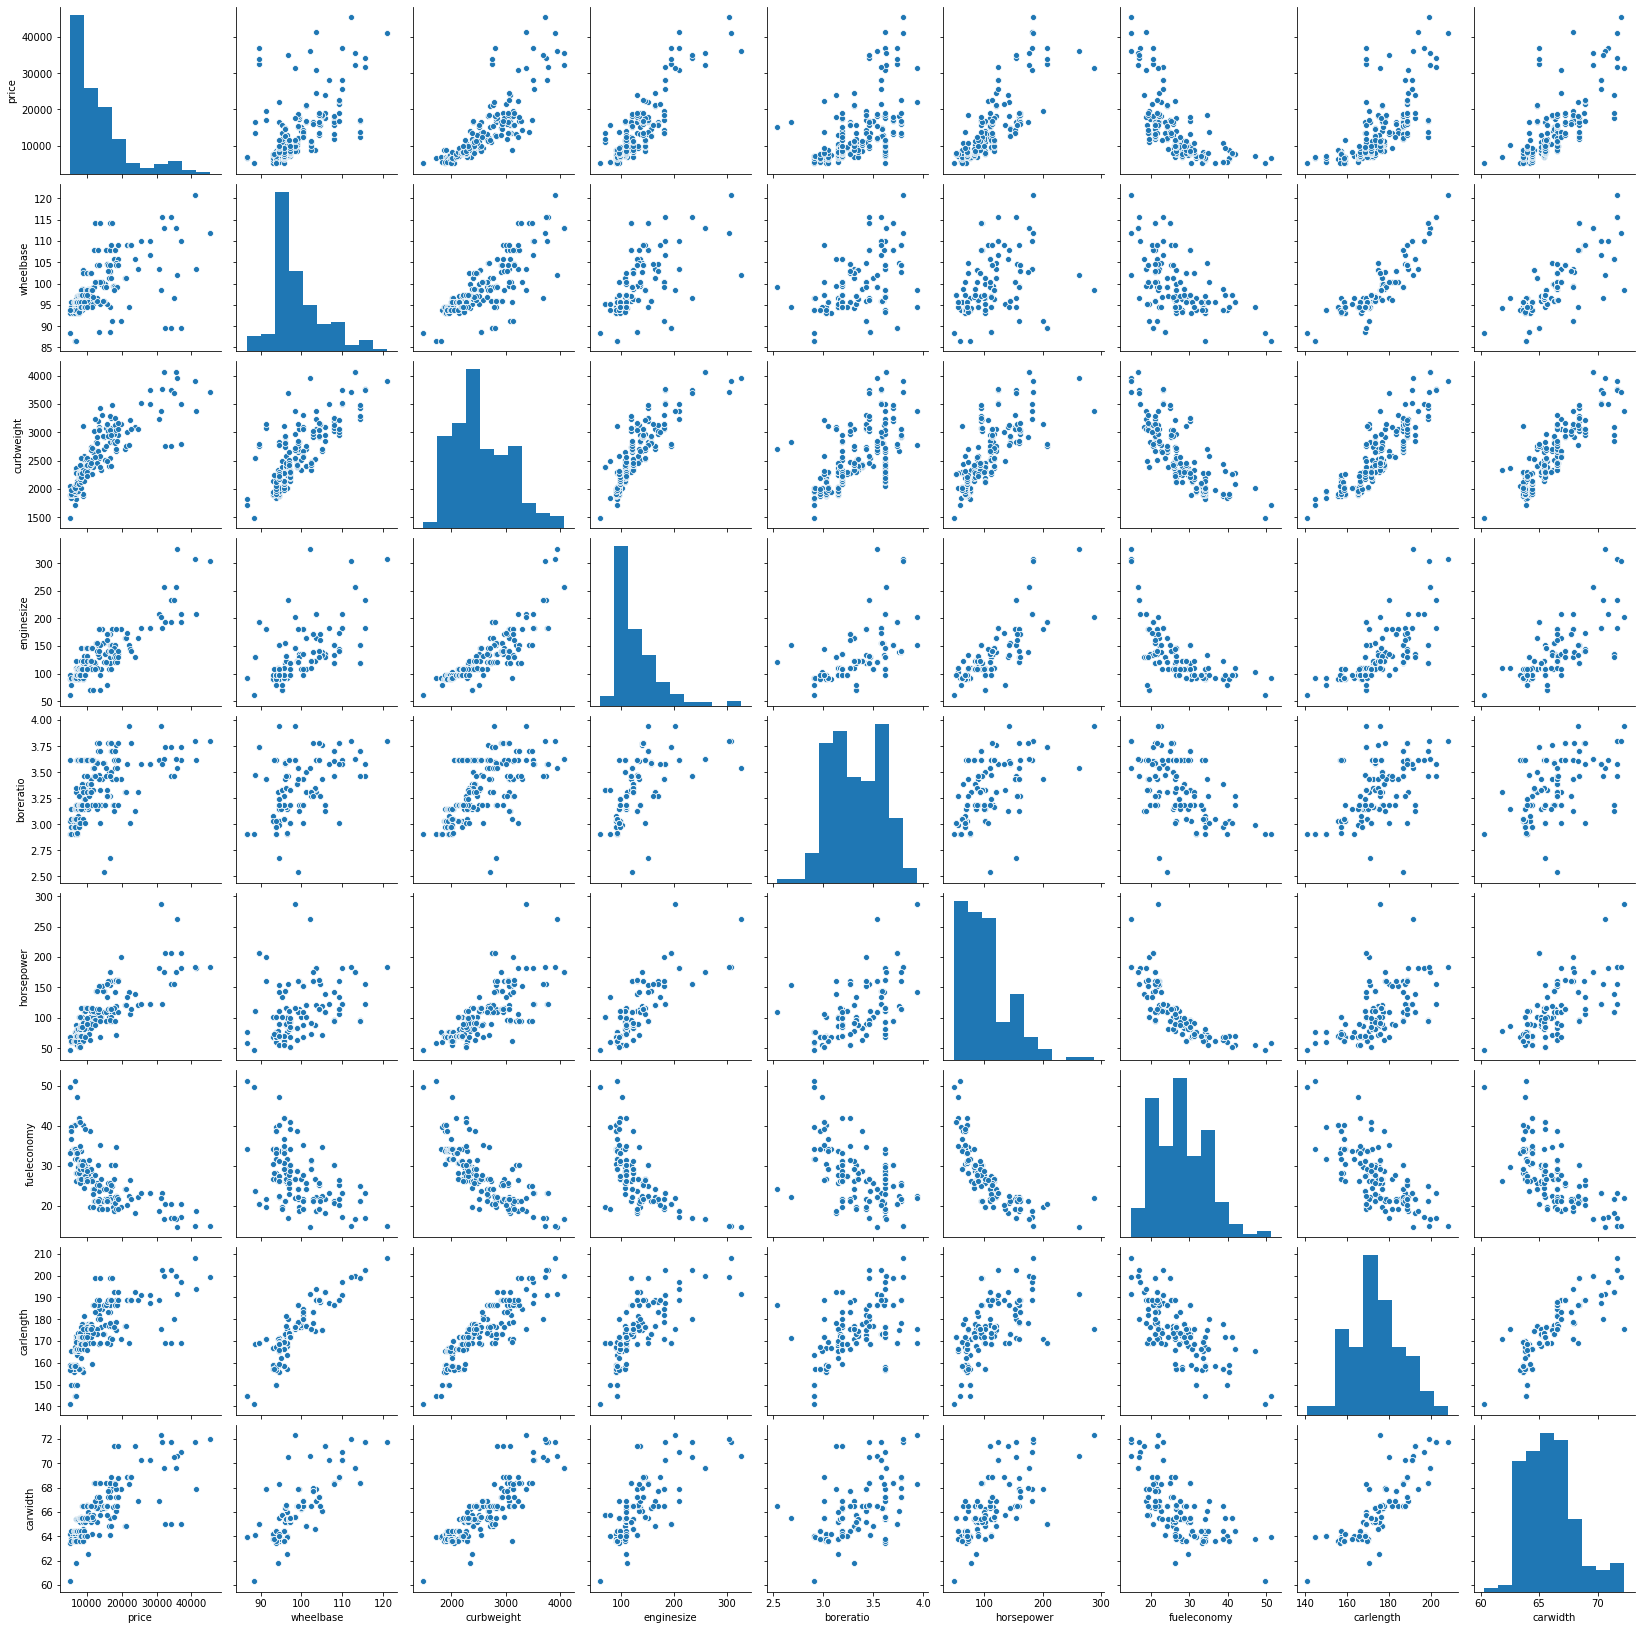

In [26]:
sns.pairplot(cars_lr)
plt.show()

In [27]:
def dummies(x,df):
    temp = pd.get_dummies(df[x],drop_first = True)
    df = pd.concat([df,temp],axis = 1)
    df.drop([x],axis = 1,inplace = True)
    return df


cars_lr = dummies('fueltype',cars_lr)
cars_lr = dummies('aspiration',cars_lr)
cars_lr = dummies('carbody',cars_lr)
cars_lr = dummies('drivewheel',cars_lr)
cars_lr = dummies('enginetype',cars_lr)
cars_lr = dummies('cylindernumber',cars_lr)
cars_lr = dummies('carsrange',cars_lr)

In [28]:
cars_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,1,...,0,0,0,1,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,1,...,1,0,0,0,1,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,1,...,0,0,0,1,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,1,...,0,0,1,0,0,0,0,0,1,0


In [29]:
cars_lr.shape

(205, 31)

### Tranin- Test Split And Feature Scaling

In [30]:
from sklearn.model_selection import train_test_split 
np.random.seed(0)
df_train,df_test = train_test_split(cars_lr,train_size = 0.7,test_size = 0.3,random_state = 100)

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars = ['wheelbase','curbweight','enginesize','boreratio','horsepower','fueleconomy','carlength','carwidth','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [32]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,1,...,0,0,0,1,0,0,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,1,...,0,0,0,1,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,1,...,0,0,0,1,0,0,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,1,...,0,0,0,1,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,1,...,0,0,0,1,0,0,0,0,1,0


In [33]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Medium,Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.909091,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.412587,0.118881
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.288490,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


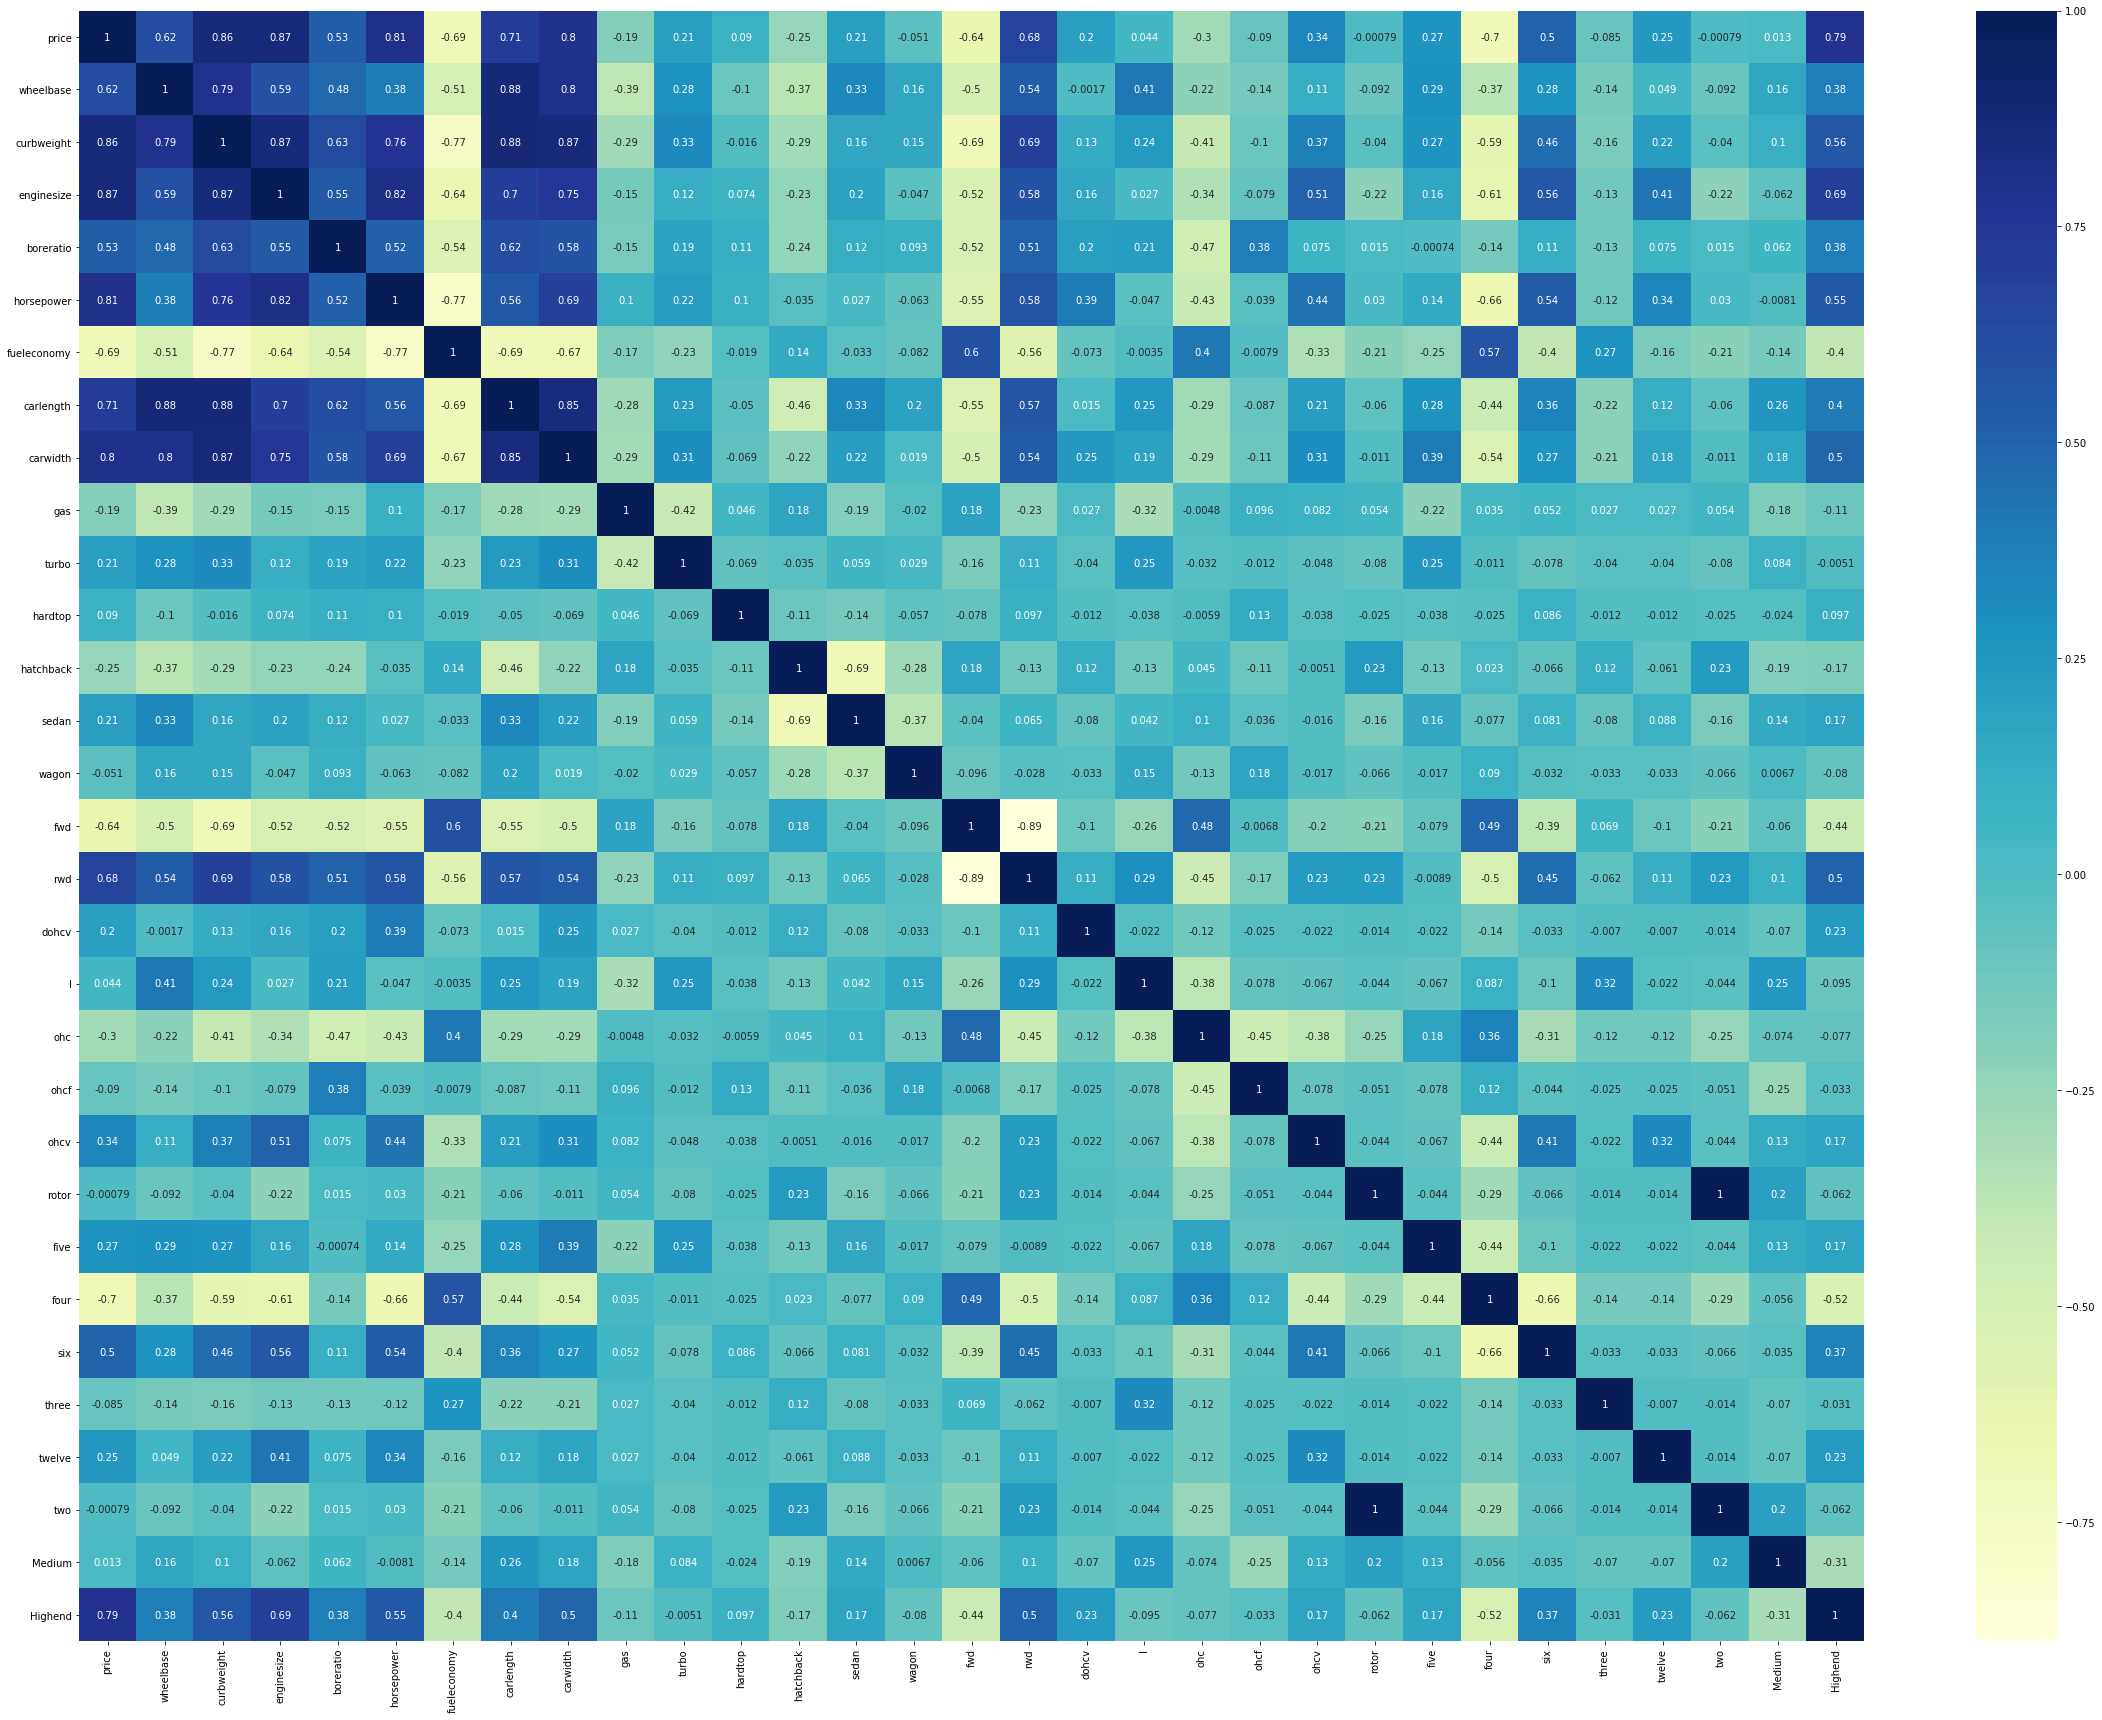

In [36]:
plt.figure(figsize = (40,30))
sns.heatmap(df_train.corr(),annot = True, cmap = "YlGnBu")
plt.show()

In [37]:
y_train = df_train.pop('price')
x_train = df_train

#### Model Building

In [58]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
lm = LinearRegression()
lm.fit(x_train,y_train) 
rfe = RFE(lm,10)
rfe = rfe.fit(x_train,y_train)

In [60]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 3),
 ('curbweight', True, 1),
 ('enginesize', False, 13),
 ('boreratio', False, 10),
 ('horsepower', True, 1),
 ('fueleconomy', True, 1),
 ('carlength', False, 11),
 ('carwidth', True, 1),
 ('gas', False, 17),
 ('turbo', False, 18),
 ('hardtop', False, 2),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 15),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', False, 9),
 ('rotor', False, 21),
 ('five', False, 6),
 ('four', False, 4),
 ('six', False, 5),
 ('three', False, 14),
 ('twelve', True, 1),
 ('two', False, 20),
 ('Medium', False, 12),
 ('Highend', True, 1)]

In [61]:
x_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'fueleconomy', 'carwidth', 'hatchback',
       'sedan', 'wagon', 'dohcv', 'twelve', 'Highend'],
      dtype='object')

In [62]:
x_train_rfe = x_train[x_train.columns[rfe.support_]]
x_train_rfe.head()

,curbweight,horsepower,fueleconomy,carwidth,hatchback,sedan,wagon,dohcv,twelve,Highend
122,0.272692,0.083333,0.530864,0.291667,0,1,0,0,0,0
125,0.500388,0.395833,0.213992,0.666667,1,0,0,0,0,1
166,0.314973,0.266667,0.344307,0.308333,1,0,0,0,0,0
1,0.411171,0.262500,0.244170,0.316667,0,0,0,0,0,0
199,0.647401,0.475000,0.122085,0.575000,0,0,1,0,0,0


In [63]:
def build_model(x,y):
    x = sm.add_constant(x)
    lm = sm.OLS(y,x).fit()
    print(lm.summary())
    return x 


def checkVIF(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by = "VIF",ascending = False)
    return(vif)

In [64]:
x_train_new = build_model(x_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     172.1
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           1.29e-70
Time:                        03:17:15   Log-Likelihood:                 205.85
No. Observations:                 143   AIC:                            -389.7
Df Residuals:                     132   BIC:                            -357.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0947      0.042     -2.243      

In [65]:
x_train_new = x_train_rfe.drop(['twelve'],axis = 1)

### Model-2

In [66]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     187.9
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           4.25e-71
Time:                        03:17:38   Log-Likelihood:                 204.17
No. Observations:                 143   AIC:                            -388.3
Df Residuals:                     133   BIC:                            -358.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0764      0.041     -1.851      

In [67]:
x_train_new = x_train_new.drop(["fueleconomy"],axis = 1)

### Model 3

In [68]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     209.5
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           7.85e-72
Time:                        03:19:26   Log-Likelihood:                 203.07
No. Observations:                 143   AIC:                            -388.1
Df Residuals:                     134   BIC:                            -361.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0305      0.026     -1.165      0.2

In [69]:
checkVIF(x_train_new)

,Features,VIF
0,const,26.90
1,curbweight,8.10
5,sedan,6.07
4,hatchback,5.63
3,carwidth,5.14
2,horsepower,3.61
6,wagon,3.58
8,Highend,1.63
7,dohcv,1.46


In [71]:
x_train_new = x_train_new.drop(['curbweight'],axis =1)

### Model 4

In [72]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           4.70e-70
Time:                        03:21:46   Log-Likelihood:                 195.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     135   BIC:                            -351.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0319      0.027     -1.161      0.2

In [73]:
checkVIF(x_train_new)

,Features,VIF
0,const,26.89
4,sedan,6.06
3,hatchback,5.54
5,wagon,3.47
1,horsepower,2.50
2,carwidth,2.22
7,Highend,1.56
6,dohcv,1.21


In [76]:
x_train_new = x_train_new.drop(['sedan'],axis = 1)

### Model 5

In [77]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     237.6
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           1.68e-69
Time:                        03:24:58   Log-Likelihood:                 191.46
No. Observations:                 143   AIC:                            -368.9
Df Residuals:                     136   BIC:                            -348.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0934      0.018     -5.219      0.0

In [78]:
checkVIF(x_train_new)

,Features,VIF
0,const,10.82
1,horsepower,2.39
2,carwidth,2.09
6,Highend,1.55
3,hatchback,1.23
5,dohcv,1.21
4,wagon,1.11


In [79]:
x_train_new = x_train_new.drop(["wagon"],axis = 1)

### Model 6

In [80]:
x_train_new = build_model(x_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           1.57e-70
Time:                        03:26:51   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

In [81]:
checkVIF(x_train_new)

,Features,VIF
0,const,10.39
1,horsepower,2.39
2,carwidth,2.08
5,Highend,1.53
4,dohcv,1.21
3,hatchback,1.13


### Model 7

In [82]:
x_train_new = x_train_new.drop(['dohcv'],axis = 1)
x_train_new = build_model(x_train_new,y_train)
checkVIF(x_train_new)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           1.04e-67
Time:                        03:29:44   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

,Features,VIF
0,const,10.04
1,horsepower,2.22
2,carwidth,2.08
4,Highend,1.53
3,hatchback,1.10


In [83]:
lm = sm.OLS(y_train,x_train_new).fit()
y_train_price = lm.predict(x_train_new)

Text(0.5, 0, 'Errors')

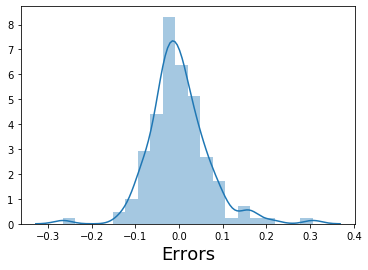

In [88]:
fig = plt.figure()
sns.distplot(y_train - y_train_price,bins = 20)

plt.xlabel('Errors',fontsize = 18)

In [90]:
num_vars = ['wheelbase','curbweight','enginesize','boreratio','horsepower','fueleconomy','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [91]:
y_test = df_test.pop('price')
x_test = df_test

In [92]:
x_train_new = x_train_new.drop('const',axis =1)
x_test_new = x_test[x_train_new.columns]
x_test_new = sm.add_constant(x_test_new)

In [93]:
y_pred = lm.predict(x_test_new)

In [94]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8614595209022033

Text(0, 0.5, 'y_pred')

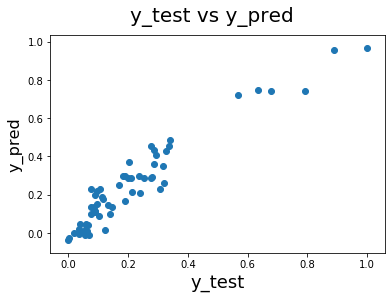

In [95]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred',fontsize = 20)
plt.xlabel('y_test',fontsize = 18)
plt.ylabel('y_pred',fontsize = 16)

In [96]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     308.0
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           1.04e-67
Time:                        03:43:54   Log-Likelihood:                 181.06
No. Observations:                 143   AIC:                            -352.1
Df Residuals:                     138   BIC:                            -337.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0824      0.018     -4.480      0.0

### Inference:

1. R-squared and adjusted R-squared 0.8999 and 0.896 - 90% variance explained.
2.P-values for all the coefficients seems to less than the significant value 0.05 - indicating that all the prediction are statistically significant.